In [1]:
import pandas as pd

# Load Sierra Leone data
df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])

df.head()


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [5]:
import os
os.listdir('../data')

['benin-malanville.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']

In [6]:
import pandas as pd

df_sierra = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])
df_sierra.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

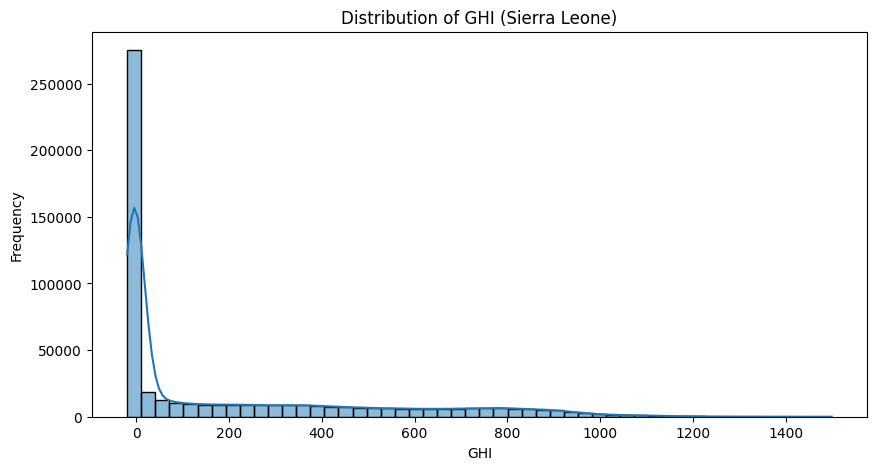

In [7]:
# 1. Check basic info
df_sierra.info()

# 2. Check missing values
df_sierra.isnull().sum()

# 3. Describe numerical columns
df_sierra.describe()

# 4. Check timestamp range and frequency
print("Start:", df_sierra['Timestamp'].min())
print("End:", df_sierra['Timestamp'].max())
print("Frequency:", df_sierra['Timestamp'].diff().mode()[0])

# 5. (Optional) Plot distribution of Global Horizontal Irradiance (GHI)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_sierra['GHI'], bins=50, kde=True)
plt.title('Distribution of GHI (Sierra Leone)')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()


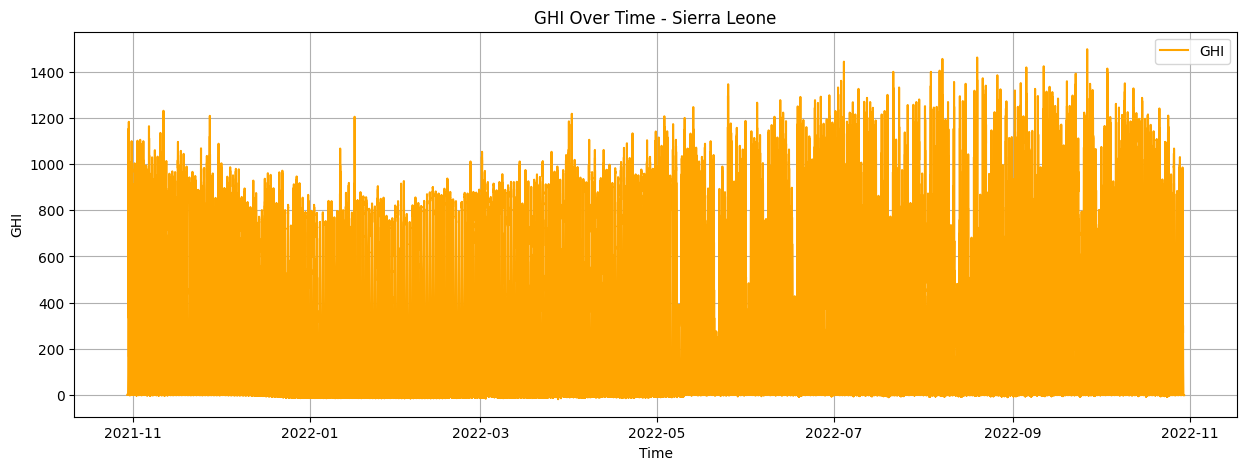

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df_sierra['Timestamp'], df_sierra['GHI'], label='GHI', color='orange')
plt.title('GHI Over Time - Sierra Leone')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.grid(True)
plt.legend()
plt.show()


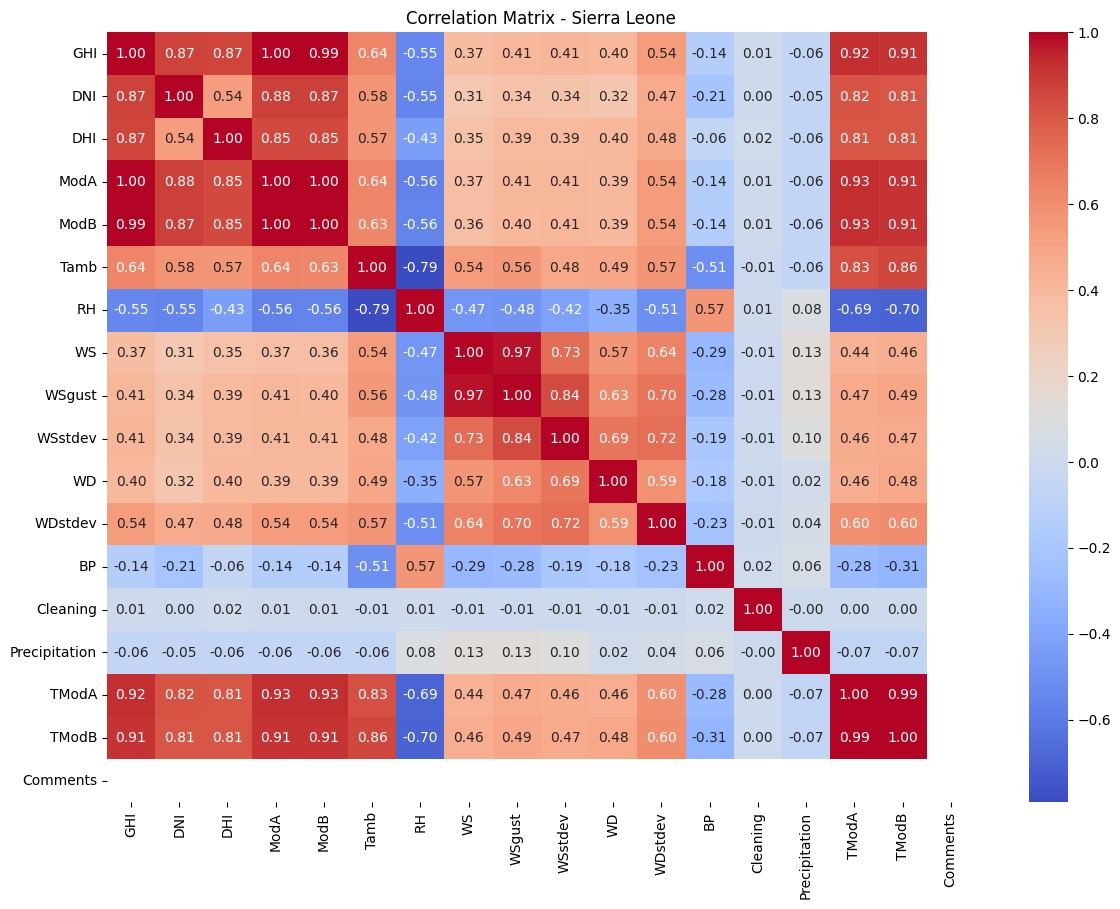

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df_sierra.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Sierra Leone")
plt.show()


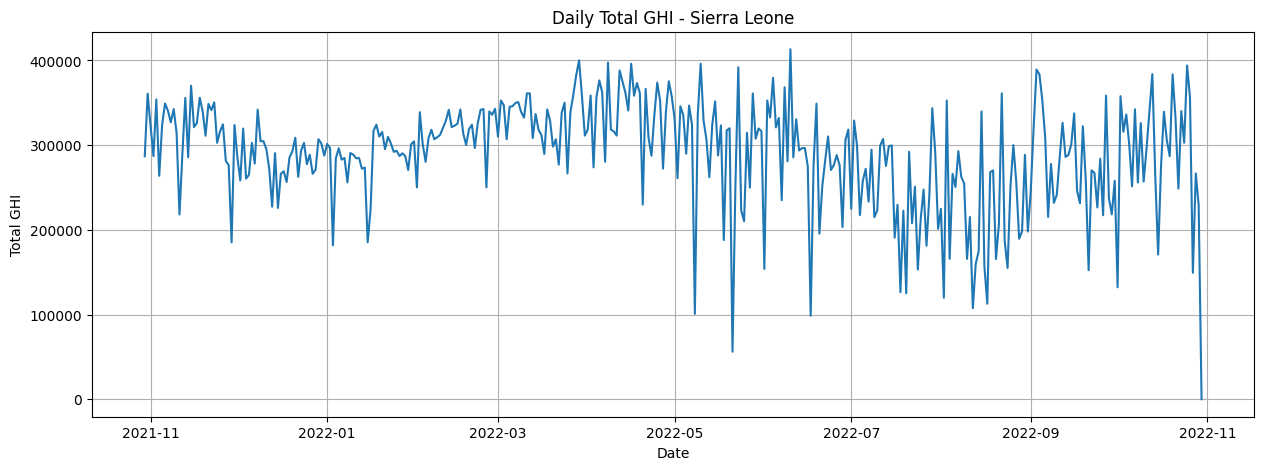

In [10]:
df_sierra['Date'] = df_sierra['Timestamp'].dt.date
daily_ghi_sierra = df_sierra.groupby('Date')['GHI'].sum()

plt.figure(figsize=(15,5))
daily_ghi_sierra.plot()
plt.title("Daily Total GHI - Sierra Leone")
plt.xlabel("Date")
plt.ylabel("Total GHI")
plt.grid(True)
plt.show()


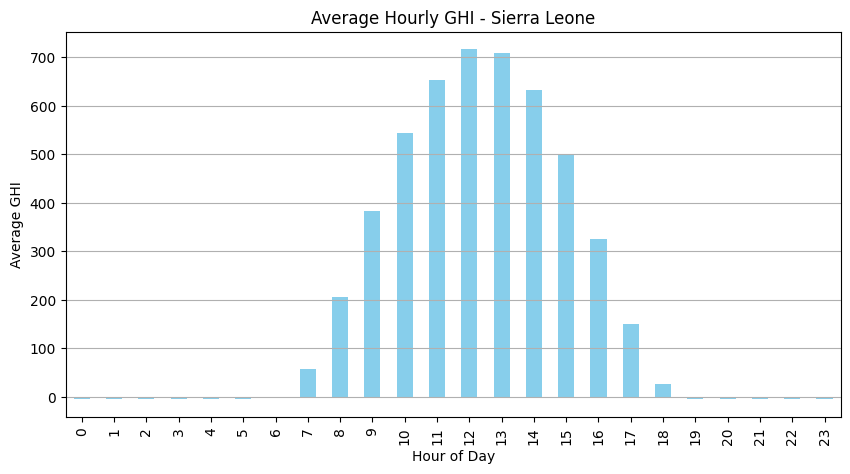

In [12]:
df_sierra['Hour'] = df_sierra['Timestamp'].dt.hour
hourly_avg_ghi_sierra = df_sierra.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(10,5))
hourly_avg_ghi_sierra.plot(kind='bar', color='skyblue')
plt.title("Average Hourly GHI - Sierra Leone")
plt.xlabel("Hour of Day")
plt.ylabel("Average GHI")
plt.grid(axis='y')
plt.show()


In [13]:
# Calculate percentage of missing values
missing_percent = df_sierra.isna().mean() * 100

# Filter columns with more than 5% missing
missing_over_5 = missing_percent[missing_percent > 5]

# Display them
print("Columns with >5% missing values:")
print(missing_over_5)


Columns with >5% missing values:
Comments    100.0
dtype: float64


In [15]:
# Z-score Outlier Detection and Output

import pandas as pd
import numpy as np
from scipy.stats import zscore

# Columns to check
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df_sierra[columns_to_check].apply(zscore)

# Mask for outliers (|Z| > 3)
outliers_mask = (np.abs(z_scores) > 3)

# Count of outliers per column
print("Number of outliers per column:")
print(outliers_mask.sum())

# Rows containing any outlier
df_outliers = df_sierra[outliers_mask.any(axis=1)]
print(f"\nTotal rows with any outlier: {df_outliers.shape[0]}")

# Show the first few outlier rows
df_outliers.head()

# (Optional) Export outliers to CSV
df_outliers.to_csv('../data/sierra_leone_outliers.csv', index=False)


Number of outliers per column:
GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

Total rows with any outlier: 16292


In [18]:
# Impute Z-score Outliers with Median

# Columns to check
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df_sierra[columns_to_check].apply(zscore)

# Replace outliers with NaN
df_imputed = df_sierra.copy()
df_imputed[columns_to_check] = df_imputed[columns_to_check].mask(np.abs(z_scores) > 3)

# Fill NaNs (i.e., outliers) with median
df_imputed[columns_to_check] = df_imputed[columns_to_check].fillna(df_imputed[columns_to_check].median())

# Save imputed data
df_imputed.to_csv('../data/sierra_leone_clean.csv', index=False)

print(f"Imputed data shape: {df_imputed.shape}")


Imputed data shape: (525600, 21)


In [19]:
# Export imputed DataFrame
output_path = '../data/sierra_leone_clean.csv'
df_imputed.to_csv(output_path, index=False)
print(f"✅ Imputed data exported to: {output_path}")


✅ Imputed data exported to: ../data/sierra_leone_clean.csv


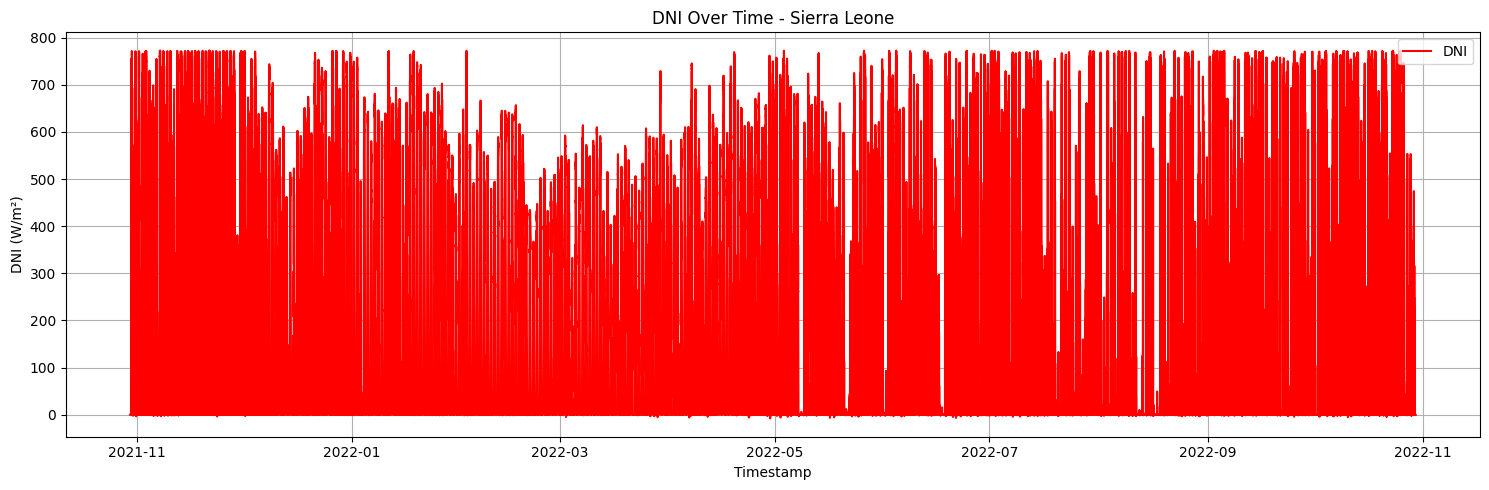

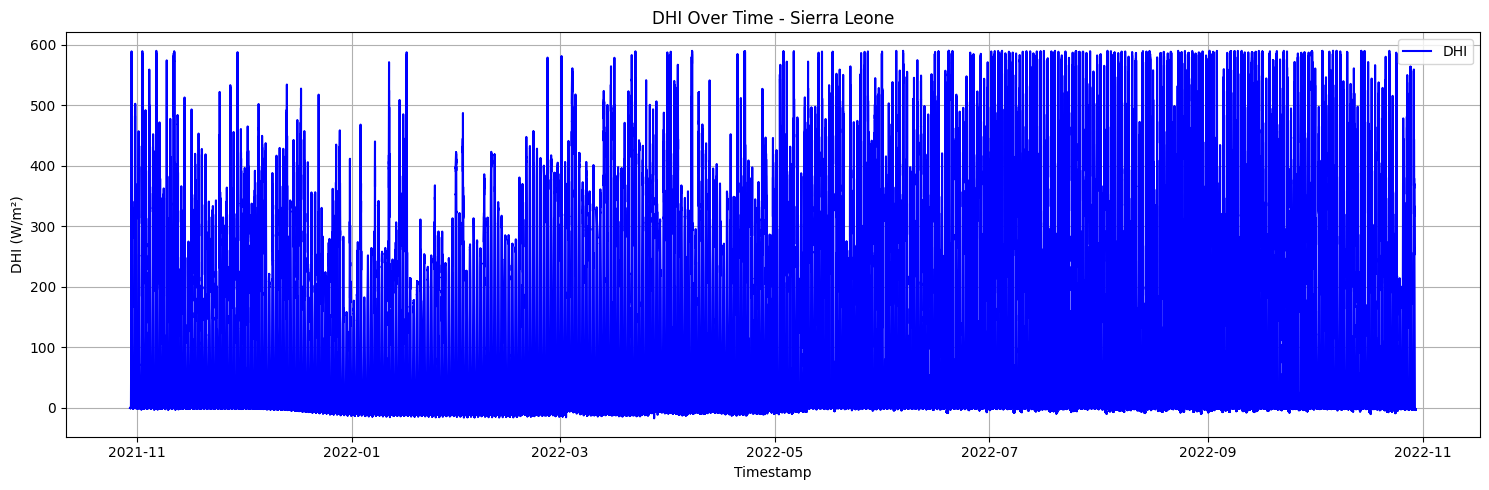

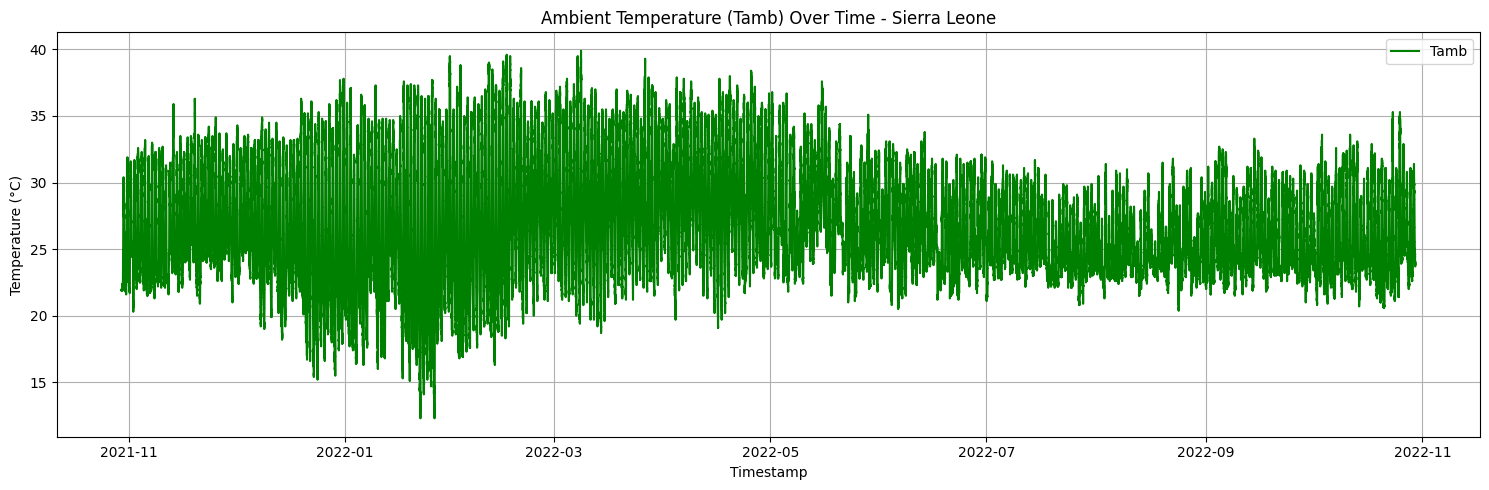

In [20]:
import matplotlib.pyplot as plt

# Time Series Plot for DNI
plt.figure(figsize=(15,5))
plt.plot(df_imputed['Timestamp'], df_imputed['DNI'], label='DNI', color='red')
plt.title("DNI Over Time - Sierra Leone")
plt.xlabel("Timestamp")
plt.ylabel("DNI (W/m²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series Plot for DHI
plt.figure(figsize=(15,5))
plt.plot(df_imputed['Timestamp'], df_imputed['DHI'], label='DHI', color='blue')
plt.title("DHI Over Time - Sierra Leone")
plt.xlabel("Timestamp")
plt.ylabel("DHI (W/m²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series Plot for Ambient Temperature (Tamb)
plt.figure(figsize=(15,5))
plt.plot(df_imputed['Timestamp'], df_imputed['Tamb'], label='Tamb', color='green')
plt.title("Ambient Temperature (Tamb) Over Time - Sierra Leone")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Time Series Analysis for Sierra Leone

The following plots show the temporal trends of key environmental variables:
- **DNI**: Direct Normal Irradiance, plotted over time.
- **DHI**: Diffuse Horizontal Irradiance, plotted over time.
- **Tamb**: Ambient Temperature, plotted over time.

These plots help us observe patterns, seasonal trends, and any anomalies in the dataset.


<Figure size 1200x600 with 0 Axes>

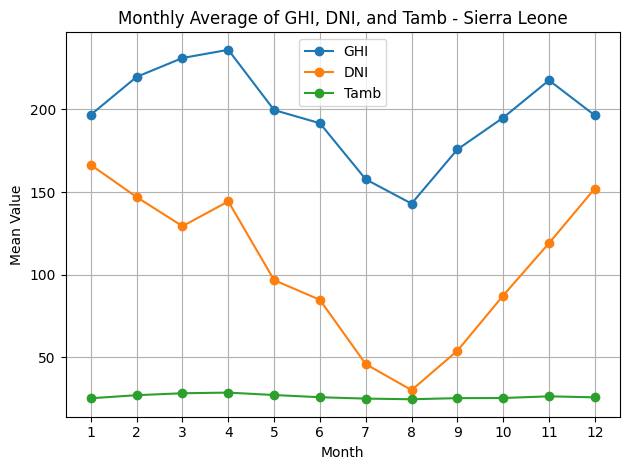

<Figure size 1200x600 with 0 Axes>

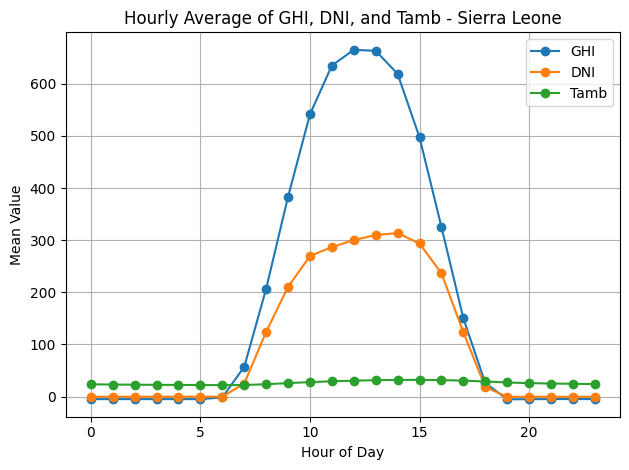

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime columns are parsed
df_imputed['Month'] = df_imputed['Timestamp'].dt.month
df_imputed['Hour'] = df_imputed['Timestamp'].dt.hour

# --- Monthly Averages ---
monthly_avg = df_imputed.groupby('Month')[['GHI', 'DNI', 'Tamb']].mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(marker='o')
plt.title("Monthly Average of GHI, DNI, and Tamb - Sierra Leone")
plt.xlabel("Month")
plt.ylabel("Mean Value")
plt.grid(True)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

# --- Hourly Averages ---
hourly_avg = df_imputed.groupby('Hour')[['GHI', 'DNI', 'Tamb']].mean()

plt.figure(figsize=(12,6))
hourly_avg.plot(marker='o')
plt.title("Hourly Average of GHI, DNI, and Tamb - Sierra Leone")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Value")
plt.grid(True)
plt.tight_layout()
plt.show()


### Monthly and Hourly Patterns

To understand seasonal and diurnal variations, we analyzed monthly and hourly averages of:

- **GHI** (Global Horizontal Irradiance)
- **DNI** (Direct Normal Irradiance)
- **Tamb** (Ambient Temperature)

These plots help identify peak solar periods and temperature trends crucial for solar farm planning.


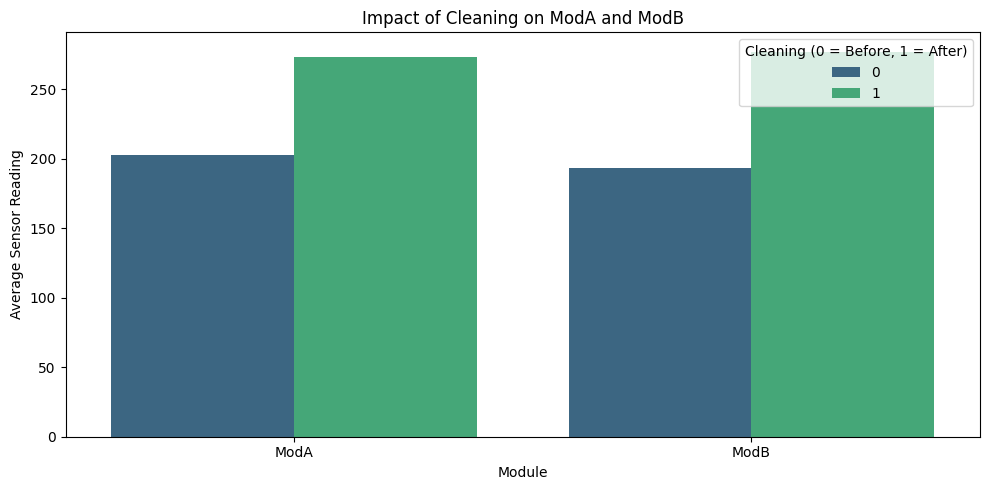

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Cleaning' column is present and has valid entries (e.g., 0 = before clean, 1 = after clean)
if 'Cleaning' in df_imputed.columns:
    cleaning_impact = df_imputed.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

    plt.figure(figsize=(10,5))
    sns.barplot(data=cleaning_impact.melt(id_vars='Cleaning', value_vars=['ModA', 'ModB']),
                x='variable', y='value', hue='Cleaning', palette='viridis')
    plt.title("Impact of Cleaning on ModA and ModB")
    plt.xlabel("Module")
    plt.ylabel("Average Sensor Reading")
    plt.legend(title='Cleaning (0 = Before, 1 = After)')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Cleaning' not found in the dataset.")


### Cleaning Impact on ModA and ModB

We compared the average readings of ModA and ModB before and after the cleaning event, using the `Cleaning` flag (0 = before, 1 = after). 

This helps determine whether cleaning improved the sensor performance and solar panel output.


Percentage increase after cleaning:
ModA: 34.64%
ModB: 43.17%


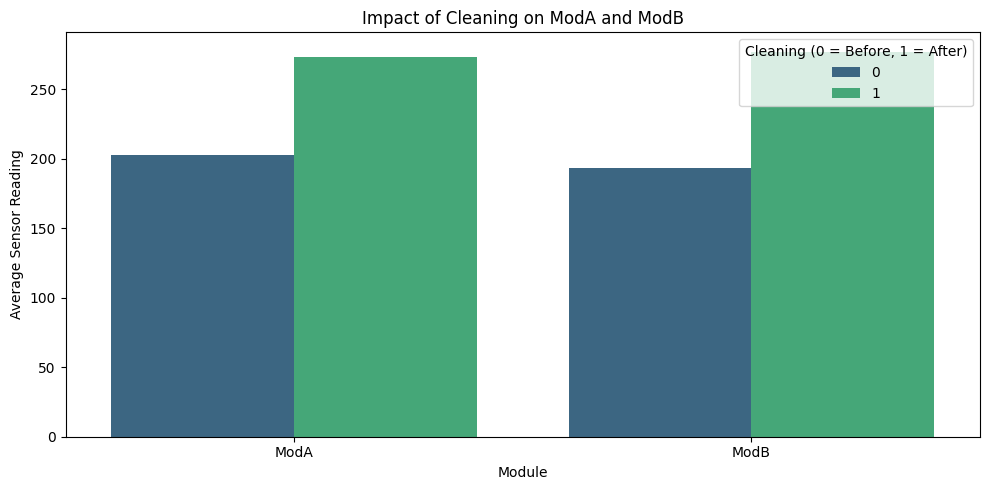

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'Cleaning' column exists
if 'Cleaning' in df_imputed.columns:
    # Group and calculate mean
    cleaning_impact = df_imputed.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

    # Calculate percentage change from before (0) to after (1) cleaning
    before_clean = cleaning_impact[cleaning_impact['Cleaning'] == 0]
    after_clean = cleaning_impact[cleaning_impact['Cleaning'] == 1]
    percent_change = ((after_clean[['ModA', 'ModB']].values - before_clean[['ModA', 'ModB']].values) 
                      / before_clean[['ModA', 'ModB']].values * 100).round(2)

    # Display percentage change
    print("Percentage increase after cleaning:")
    print(f"ModA: {percent_change[0][0]}%")
    print(f"ModB: {percent_change[0][1]}%")

    # Bar plot
    plt.figure(figsize=(10,5))
    sns.barplot(data=cleaning_impact.melt(id_vars='Cleaning', value_vars=['ModA', 'ModB']),
                x='variable', y='value', hue='Cleaning', palette='viridis')
    plt.title("Impact of Cleaning on ModA and ModB")
    plt.xlabel("Module")
    plt.ylabel("Average Sensor Reading")
    plt.legend(title='Cleaning (0 = Before, 1 = After)')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Cleaning' not found in the dataset.")


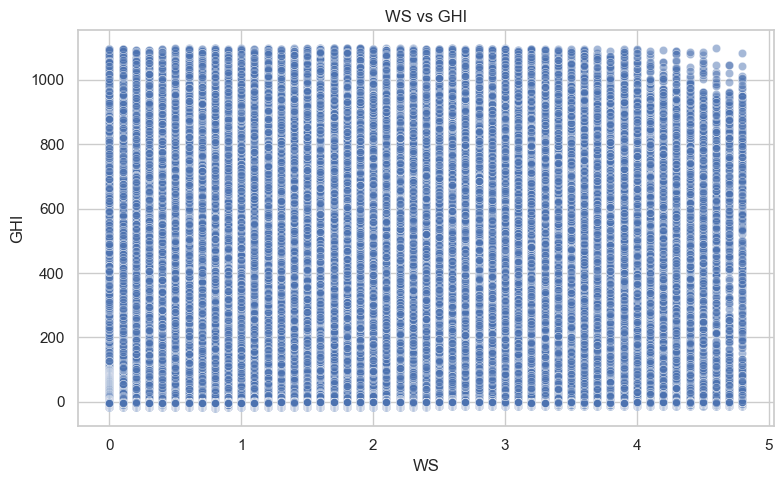

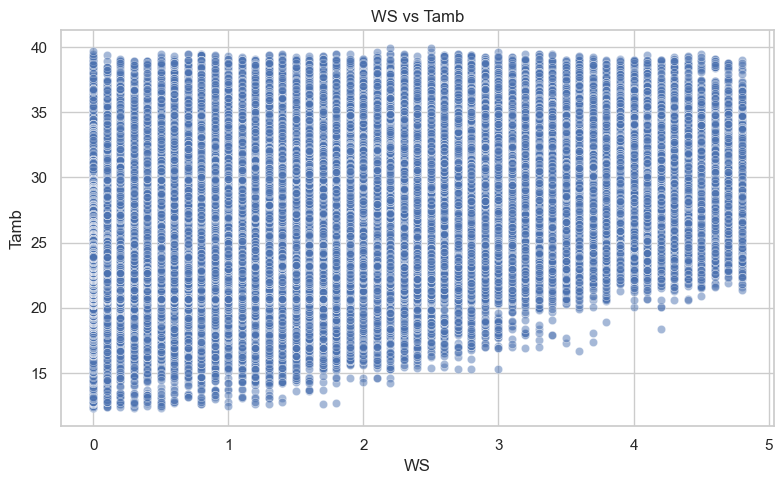

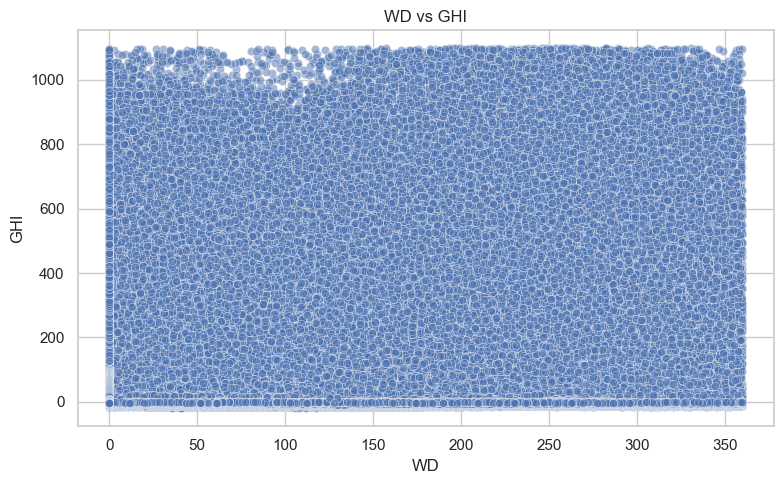

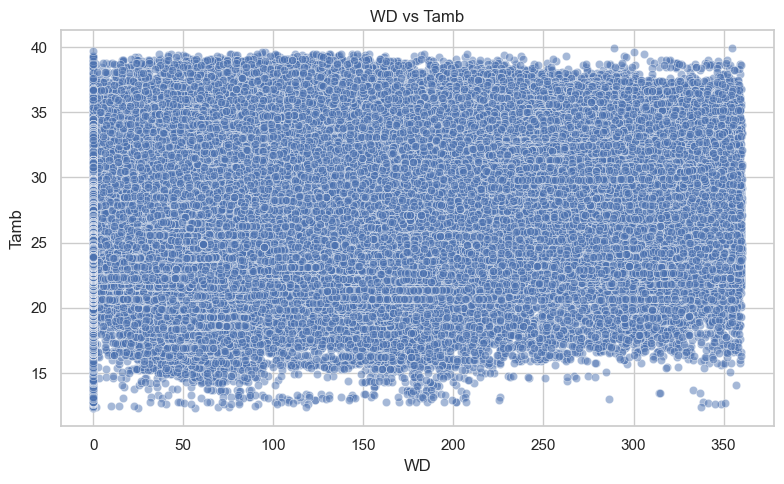

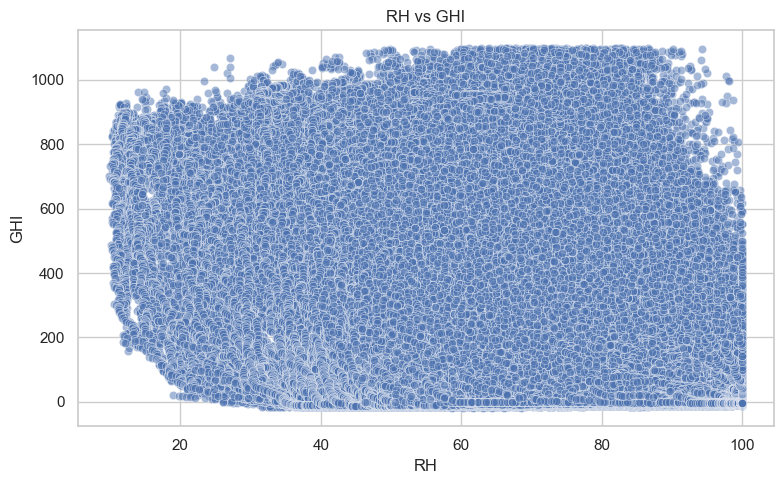

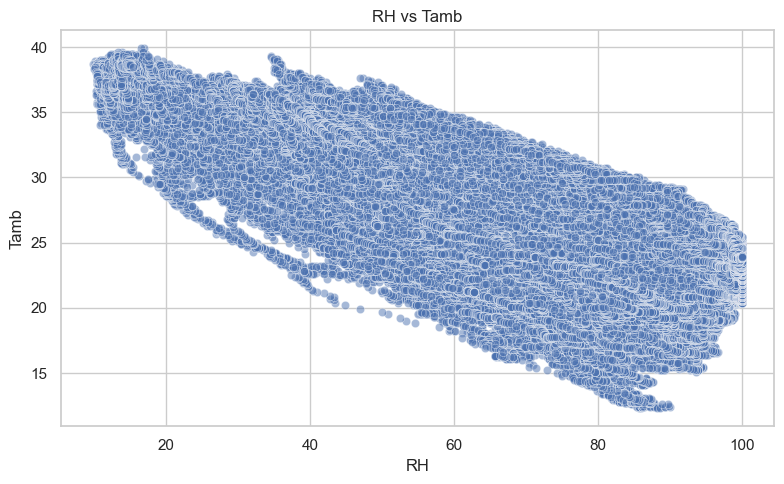

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define variables to plot
x_vars = ['WS', 'WD', 'RH']
y_vars = ['GHI', 'Tamb']

# Set plot style
sns.set(style="whitegrid")

# Create scatter plots
for x in x_vars:
    for y in y_vars:
        plt.figure(figsize=(8,5))
        sns.scatterplot(data=df_imputed, x=x, y=y, alpha=0.5)
        plt.title(f"{x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


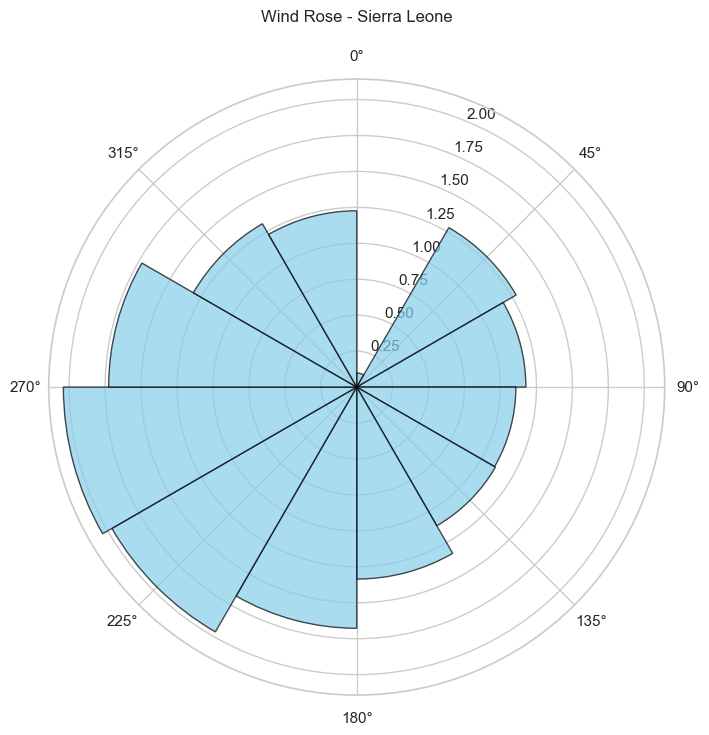

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Bin wind direction into 30-degree intervals
df_imputed['WD_bin'] = pd.cut(df_imputed['WD'], bins=np.arange(0, 361, 30), include_lowest=True)

# Compute mean wind speed for each direction bin
wind_rose_data = df_imputed.groupby('WD_bin', observed=False)['WS'].mean().reset_index()

# Convert bin intervals to midpoints and ensure float type
wind_rose_data['Direction'] = wind_rose_data['WD_bin'].apply(lambda x: (x.left + x.right) / 2).astype(float)

# Convert degrees to radians
theta = np.deg2rad(wind_rose_data['Direction'].values)
radii = wind_rose_data['WS'].values

# Plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=np.deg2rad(30), bottom=0.0, color='skyblue', edgecolor='black', alpha=0.7)

# Set orientation
ax.set_theta_zero_location('N')  # 0° at the top
ax.set_theta_direction(-1)       # Clockwise

# Title
ax.set_title("Wind Rose - Sierra Leone", y=1.08)
plt.show()


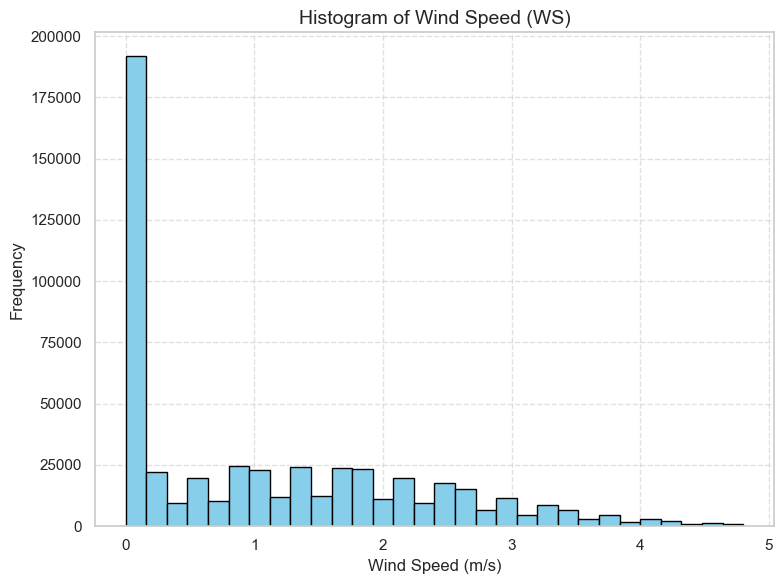

In [28]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_imputed['WS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


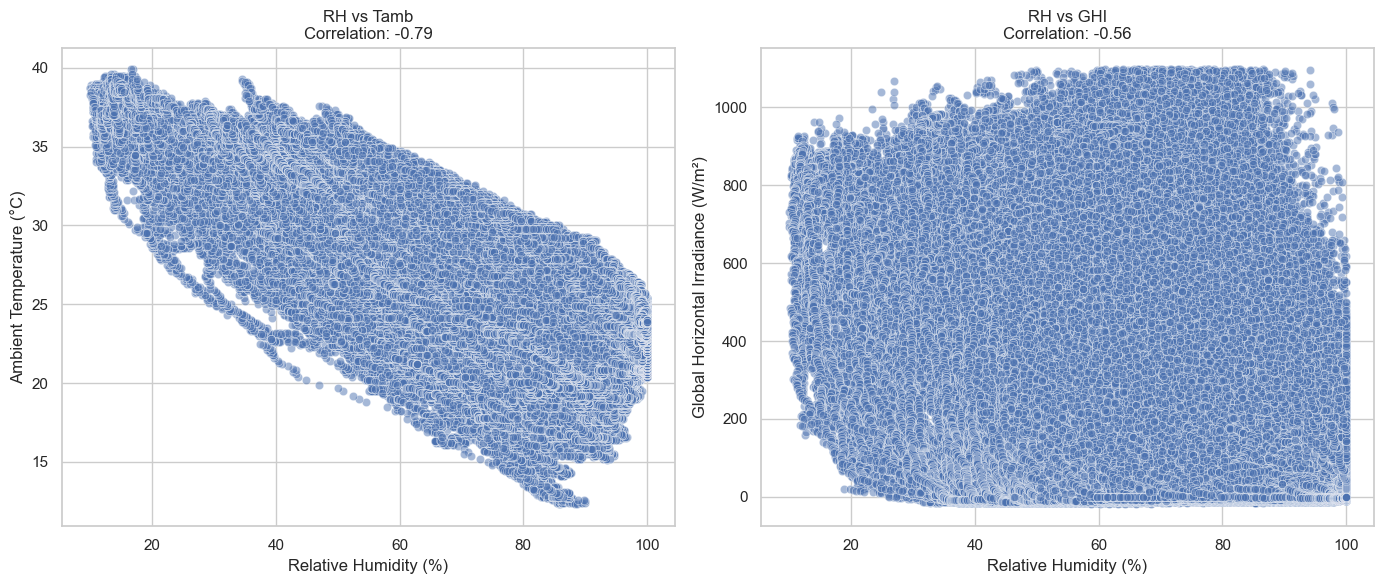

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 6))

# RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_imputed, x='RH', y='Tamb', alpha=0.5)
plt.title(f'RH vs Tamb\nCorrelation: {df_imputed["RH"].corr(df_imputed["Tamb"]):.2f}')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)

# RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_imputed, x='RH', y='GHI', alpha=0.5)
plt.title(f'RH vs GHI\nCorrelation: {df_imputed["RH"].corr(df_imputed["GHI"]):.2f}')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.grid(True)

plt.tight_layout()
plt.show()


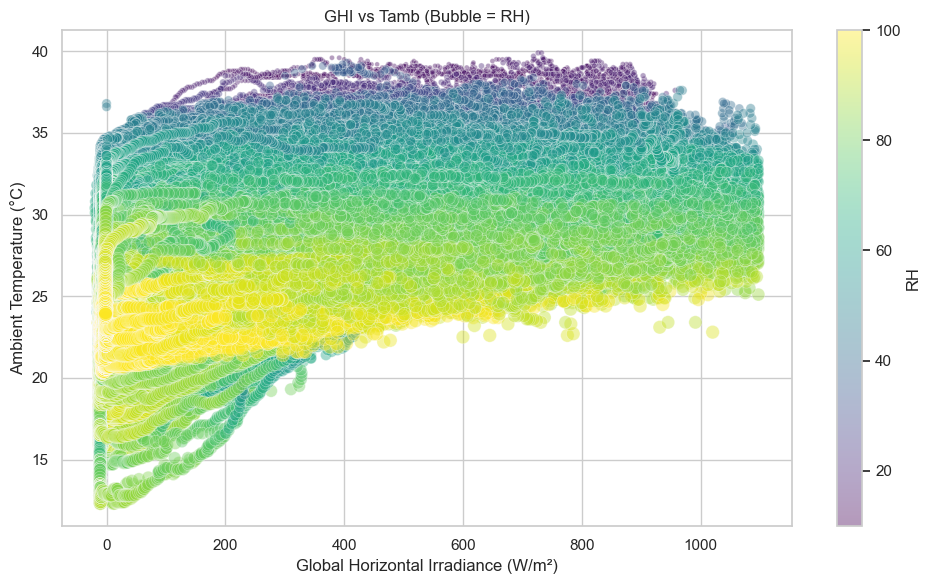

In [30]:
import matplotlib.pyplot as plt

# Choose one: 'RH' or 'BP' as bubble size
bubble_variable = 'RH'  # Change to 'BP' if you prefer

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_imputed['GHI'], 
    df_imputed['Tamb'], 
    s=df_imputed[bubble_variable],  # Bubble size
    alpha=0.4, 
    c=df_imputed[bubble_variable],  # Bubble color
    cmap='viridis',
    edgecolors='w',
    linewidths=0.5
)

plt.colorbar(scatter, label=bubble_variable)
plt.title(f'GHI vs Tamb (Bubble = {bubble_variable})')
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()
